In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pickle

# Processing the Data

In [2]:
df = pd.read_csv('corpus.csv')
df.head()

,Unnamed: 0,text,source,text_length,word_count,Prompt,lexical_diversity,avg_sentence_length,readability_score,char_count,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0,"Federal law supersedes state law, and cannabis...",Bloom-7B,967,181,Undefined,0.806630,25.857143,57.30,967,...,-0.035092,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744
1,1,Miles feels restless after working all day. He...,Bloom-7B,5068,924,Undefined,0.661255,23.100000,53.21,5068,...,-0.003091,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853
2,2,So first of I am danish. That means that I fol...,Bloom-7B,1602,316,Undefined,0.718354,22.571429,61.97,1602,...,0.011013,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179
3,3,In this paper we present a novel rule-based ap...,Bloom-7B,5469,1015,Undefined,0.564532,40.600000,27.86,5469,...,-0.018165,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899
4,4,"Most social progressives, love democracy, and ...",Bloom-7B,2379,437,Undefined,0.752860,23.000000,61.67,2379,...,0.004131,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097


In [3]:
df.shape

(788922, 63)

In [4]:
df.drop(['Unnamed: 0', 'text', 'prompt_length', 'source', 
         'text_length', 'word_count', 'Prompt', 
         'avg_sentence_length', 'char_count', 
         'sentence_count'], axis=1, inplace = True)
df

,lexical_diversity,readability_score,classification,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0.806630,57.30,1,0.008560,0.095722,-0.049095,-0.118440,-0.004019,0.043696,-0.116908,...,-0.035092,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744
1,0.661255,53.21,1,0.070761,-0.099866,0.107777,0.008168,-0.063522,0.097034,0.091039,...,-0.003091,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853
2,0.718354,61.97,1,0.164173,0.117847,-0.012992,0.088472,0.097658,-0.002207,-0.073280,...,0.011013,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179
3,0.564532,27.86,1,-0.179447,0.010308,0.155961,0.029293,0.099195,-0.101426,-0.038001,...,-0.018165,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899
4,0.752860,61.67,1,0.159706,0.083560,-0.074277,0.031704,0.066774,0.062544,-0.055907,...,0.004131,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,0.420610,36.22,1,-0.157033,-0.008564,-0.079678,0.104863,-0.095362,0.039880,-0.053883,...,-0.005222,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202
788918,0.395532,29.08,1,-0.282313,0.034885,-0.078380,-0.014602,-0.034506,0.077010,0.023160,...,-0.006157,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802
788919,0.447761,47.22,1,-0.264905,-0.011840,0.106972,0.034591,-0.192508,0.167850,-0.146308,...,0.010574,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205
788920,0.476351,28.77,1,-0.263766,0.064379,-0.021544,-0.112702,-0.044006,0.123673,0.041577,...,0.013639,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060


In [5]:
df['classification'].value_counts()

1    441230
0    347692
Name: classification, dtype: int64

In [6]:
X = df.drop(['classification'], axis=1)
X

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0.806630,57.30,0.008560,0.095722,-0.049095,-0.118440,-0.004019,0.043696,-0.116908,-0.008107,...,-0.035092,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744
1,0.661255,53.21,0.070761,-0.099866,0.107777,0.008168,-0.063522,0.097034,0.091039,0.015570,...,-0.003091,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853
2,0.718354,61.97,0.164173,0.117847,-0.012992,0.088472,0.097658,-0.002207,-0.073280,-0.042987,...,0.011013,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179
3,0.564532,27.86,-0.179447,0.010308,0.155961,0.029293,0.099195,-0.101426,-0.038001,0.011437,...,-0.018165,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899
4,0.752860,61.67,0.159706,0.083560,-0.074277,0.031704,0.066774,0.062544,-0.055907,-0.002149,...,0.004131,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,0.420610,36.22,-0.157033,-0.008564,-0.079678,0.104863,-0.095362,0.039880,-0.053883,-0.106344,...,-0.005222,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202
788918,0.395532,29.08,-0.282313,0.034885,-0.078380,-0.014602,-0.034506,0.077010,0.023160,0.014074,...,-0.006157,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802
788919,0.447761,47.22,-0.264905,-0.011840,0.106972,0.034591,-0.192508,0.167850,-0.146308,-0.042047,...,0.010574,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205
788920,0.476351,28.77,-0.263766,0.064379,-0.021544,-0.112702,-0.044006,0.123673,0.041577,-0.016348,...,0.013639,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060


In [7]:
y = df['classification']
y

0         1
1         1
2         1
3         1
4         1
         ..
788917    1
788918    1
788919    1
788920    1
788921    1
Name: classification, Length: 788922, dtype: int64

# Data Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(631137, 52)
(157785, 52)
(631137,)
(157785,)


# Oversampling using ADASYN

In [10]:
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [11]:
X_resampled

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0.417978,44.030000,-0.028298,0.235729,-0.119890,0.012450,-0.049655,0.020836,0.081456,-0.005956,...,0.049609,-0.019959,-0.014821,-0.011888,0.007007,-0.031287,-0.029798,-0.009144,0.020187,-0.004240
1,0.486331,18.350000,-0.285594,0.093629,-0.020098,0.058807,-0.011897,-0.027218,0.125155,0.024640,...,-0.001384,-0.021283,0.021422,0.014839,0.016114,-0.000148,-0.003200,0.024329,0.036614,0.011967
2,0.649682,69.820000,0.145476,0.205359,-0.022710,0.031460,0.078788,-0.054157,-0.091834,-0.065708,...,-0.020616,-0.001738,0.019349,0.023713,0.038916,-0.024163,-0.015902,0.029937,0.007026,0.008091
3,0.419780,70.630000,0.096494,-0.160023,-0.079883,0.027915,-0.138550,-0.047022,0.121929,-0.046468,...,-0.038442,0.023495,0.057251,-0.003178,-0.038109,0.003587,-0.019907,-0.017387,-0.003197,0.020420
4,0.891892,81.120000,0.223751,0.181031,0.009854,0.031525,-0.223295,-0.051569,0.006036,0.027013,...,-0.011595,-0.077965,0.020868,0.022083,0.025668,-0.011525,-0.015577,0.059956,0.007639,-0.005578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685952,0.657538,35.931440,0.023408,0.062457,-0.049270,0.046745,0.054091,0.008605,-0.059339,-0.039116,...,-0.002946,0.000684,0.008364,0.006608,-0.013800,-0.007865,0.009997,-0.005235,0.000944,0.008428
685953,0.597901,81.830000,0.200792,0.107150,-0.025438,0.051745,0.054845,-0.030241,-0.062238,-0.019535,...,-0.004963,0.017622,-0.007000,0.005769,0.006044,-0.013099,-0.015952,0.011508,0.017696,0.005992
685954,0.608811,51.953921,0.100465,-0.031739,-0.008198,0.057046,0.103455,-0.022977,-0.003092,-0.019296,...,0.008456,0.002493,0.001082,-0.013819,-0.002907,-0.020004,-0.024598,-0.005972,0.004125,-0.002226
685955,0.802853,97.540000,0.090853,-0.052084,0.177980,-0.074527,-0.129642,-0.084174,-0.005751,-0.118104,...,0.088023,0.029923,0.035215,-0.034485,-0.078118,-0.009134,-0.036494,0.042401,0.091348,-0.008648


In [12]:
y_resampled.value_counts()

1    353116
0    332841
Name: classification, dtype: int64

# Logistic Regression Classifier

In [13]:
log_reg_clf = LogisticRegression(max_iter = 1000)

log_reg_clf.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000)

In [14]:
y_hat_logreg = log_reg_clf.predict(X_test)

print(classification_report(y_test, y_hat_logreg))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70     69671
           1       0.77      0.71      0.74     88114

    accuracy                           0.72    157785
   macro avg       0.72      0.72      0.72    157785
weighted avg       0.73      0.72      0.72    157785



In [15]:
logreg_accuracy = accuracy_score(y_test, y_hat_logreg)
logreg_accuracy

0.7214754254206673

# K-Nearest Neighbors Classifiers

In [16]:
Knn_clf = KNeighborsClassifier()

Knn_clf.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [17]:
y_hat_knn = Knn_clf.predict(X_test)

print(classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78     69671
           1       0.87      0.71      0.78     88114

    accuracy                           0.78    157785
   macro avg       0.79      0.79      0.78    157785
weighted avg       0.80      0.78      0.78    157785



In [18]:
knn_accuracy = accuracy_score(y_test, y_hat_knn)
knn_accuracy

0.7809107329594068

# Random Forest Classifier

In [19]:
rf_clf_model = RandomForestClassifier(n_estimators=200)

rf_clf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=200)

In [20]:
y_hat_rfc = rf_clf_model.predict(X_test)

print(classification_report(y_test,y_hat_rfc))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     69671
           1       0.88      0.90      0.89     88114

    accuracy                           0.87    157785
   macro avg       0.87      0.87      0.87    157785
weighted avg       0.87      0.87      0.87    157785



In [21]:
rf_accuracy = accuracy_score(y_test, y_hat_rfc)
rf_accuracy

0.8734100199638749

# Hyperparameter Tuning

In [22]:
'''# Define hyperparameters to search
rf_param_grid = {
    'n_estimators': [200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini','entropy']
}'''

"# Define hyperparameters to search\nrf_param_grid = {\n    'n_estimators': [200, 300],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'criterion': ['gini','entropy']\n}"

In [23]:
'''from sklearn.model_selection import GridSearchCV

rf_clf_hpt = GridSearchCV(estimator=rf_clf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=3)

rf_clf_hpt.fit(X_resampled, y_resampled)'''

"from sklearn.model_selection import GridSearchCV\n\nrf_clf_hpt = GridSearchCV(estimator=rf_clf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=3)\n\nrf_clf_hpt.fit(X_resampled, y_resampled)"

# Accuracy Comparison

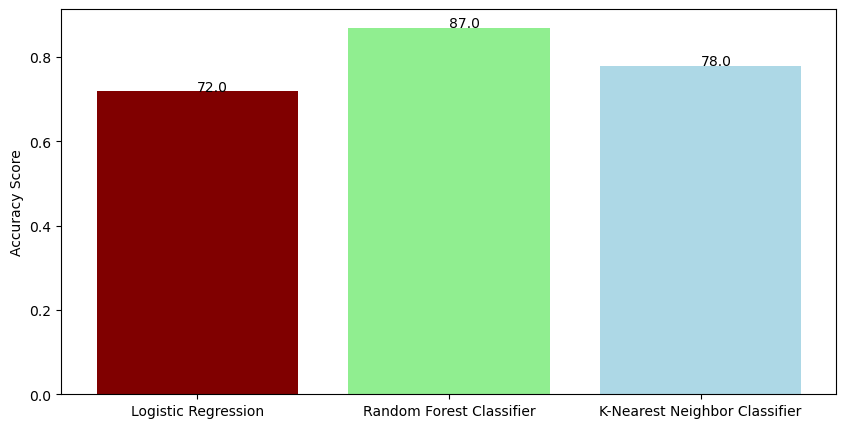

In [24]:
models = ['Logistic Regression', 'Random Forest Classifier', 'K-Nearest Neighbor Classifier']

accuracy_scores = [round(logreg_accuracy, 2), round(rf_accuracy, 2), round(knn_accuracy, 2)]

plt.figure(figsize=[10,5])
plt.bar(models, accuracy_scores, color=['maroon', 'lightgreen', 'lightblue'])

plt.ylabel('Accuracy Score')

for i in range(len(models)):
    plt.text(i,accuracy_scores[i], str(accuracy_scores[i]*100))

# Save the model to a file

In [25]:
with open('binaryclf_rf.pkl', 'wb') as f:
    pickle.dump(rf_clf_model, f)